In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
import os
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [4]:
import matplotlib.patches as patches
import matplotlib.colors as colors

cm = colors.LinearSegmentedColormap.from_list('gray_gold_map', [colors.to_rgb('darkgray'), 
                                                                colors.to_rgb('gold')], N=100)
def show_board(bp,wp,response,color,save=False):    
    fig = plt.figure(figsize=[9,4])
    ax = fig.add_subplot(111,aspect='equal')
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5)
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5)
    
    black_pieces = np.nonzero(np.array(list(bp)).astype(int))[0]
    white_pieces = np.nonzero(np.array(list(wp)).astype(int))[0]
    
    for p in black_pieces:
        circ = patches.Circle((p%9,p//9),0.33,color="black",fill=True)
        circ = ax.add_patch(circ)
    for p in white_pieces:
        circ = patches.Circle((p%9,p//9),0.33,color="white",fill=True)
        circ = ax.add_patch(circ)
    for p in [response]:
        circ = patches.Circle((p%9,p//9),0.33,color=color,fill=False)
        circ = ax.add_patch(circ)
    plt.imshow(np.zeros(shape=[4,9]), cmap=cm, 
               interpolation='nearest',origin='bottom',vmin=0,vmax=0.2)
    ax.axis('off')
    fig.tight_layout()
    #if save:
    #    fig.savefig('C:/Users/svo/Documents/fmri/Boards/board_' + bp + '_' + wp + '.png')
    plt.show()

In [5]:
def plot_with_errorbars(fig,ax,x,A,colors=None):
    m = np.mean(A,axis=0)
    s = np.std(A-m[None,:],axis=0)/np.sqrt(30)
    plt.errorbar(x,m,yerr = s,color='black')
    if not colors is None:
        ax.scatter(x,m,color=colors)
    else:
        ax.plot(x,m,'.')

In [6]:
#time_colors = ['#9B1A30','#F85D5F','#FFAC9A']
#learn_colors = ['#4B8F7C', '#3C7864', '#2E614D','#1F4935','#10321D']
#peak_colors = ['#00B4D8','#0096C7','#0077B6','#023E8A','#03045E']

time_colors = ['#9F4AB0','#6E207D','#430F4D']
learn_colors = ['#7DE3AC', '#0EE676', '#129951','#17452D','#20382B']
peak_colors = ['#D7E8FA','#A3CDF7','#3C92E8','#0E5296','#0F3153']

In [7]:
import pandas as pd
boards_hvh = pd.read_csv(direc+'Opt/opt_hvh.txt',delim_whitespace=True,header=None)[[0,1]].values

In [8]:
move_stats_hvh = np.loadtxt(direc + 'Move statistics/move_stats_hvh.txt',dtype=int)
#columns are player id, color, cross-validation group, number of pieces, chosen move, and response time in ms
num_pieces_hvh = move_stats_hvh[:,3]

In [9]:
import json
with open(direc + 'Ratings/ratings_all_expts_peak.txt') as f:
    rating_dict = json.load(f)
selected_peak_users = np.unique([player[:player.find('_')] for player in rating_dict.keys() if '_block' in player])
print(selected_peak_users)
ratings_peak = np.array([[rating_dict[player + '_block' + str(block)] for block in [20,40,60,80,100]] 
                         for player in selected_peak_users])
ratings_learn = np.array([[rating_dict['subj' + str(j).zfill(2) + 'sess' + str(i).zfill(2)] for i in range(5)] for j in range(30)])
ratings_time = np.array([[rating_dict['subj' + str(j).zfill(2) + 'cond' + str(i).zfill(2)] for i in range(3)] for j in range(30)])

['AREwvNqTxc' 'DbdTTxgeAE' 'DsMabUjLzp' 'GVpQmKgSvR' 'LzYOQEtWyg'
 'OZvufMjxqA' 'PIBgFMOgkZ' 'PbAYOdgWyk' 'PnNILDnLdX' 'SDcMeNjEjm'
 'TEjfRKZcni' 'WASWCjvkSf' 'YsUzdeYobm' 'ZAhCMtLOSa' 'beGvAksWzP'
 'dseDAhZdPo' 'eOOVawOFxb' 'grSuRIZKsB' 'kaGdDjZqWg' 'kalkupPyEF'
 'kplBsqsGaT' 'lcMQOJykbE' 'niBZloyGmz' 'nyhNeYdVsh' 'ovIeXCoase'
 'qFpKOzFdKp' 'tnGMrUGByz' 'vPktHzWCfa' 'vxzuIORJKX' 'ylDZcLSGzi']


In [10]:
params_learn = np.reshape(np.loadtxt(direc + 'Params/params_learn_final.txt'),[30,5,5,58])
params_time = np.reshape(np.loadtxt(direc + 'Params/params_tai_final.txt'),[30,3,5,58])
params_peak = np.reshape(np.loadtxt(direc + 'Peak/params_peak_final_long2.txt'),[30,5,5,58])
feature_drop_rate_learn = params_learn[:,:,:,-1]
feature_drop_rate_time = params_time[:,:,:,-1]
feature_drop_rate_peak = params_peak[:,:,:,-1]


In [11]:
depth_learn = np.reshape([[np.mean(np.loadtxt(direc + 'Learning/splits/'+str(i)+'/pv_depth_' + str(j) + '.txt'))
                           for j in range(1,6)] for i in range(0,150)],[30,5,5])

In [12]:
depth_time = np.reshape([[np.mean(np.loadtxt(direc + 'Timed AI/splits/'+str(i)+'/pv_depth_' + str(j) + '.txt'))
                           for j in range(1,6)] for i in range(0,90)],[30,3,5])

In [13]:
depth_peak = np.reshape([[np.mean(np.loadtxt(direc + 'Peak/splits/'+str(i)+'/pv_depth_' + str(j) + '.txt'))
                           for j in range(1,6)] for i in range(1,151)],[30,5,5])

In [14]:
depth_peak = depth_peak[:,[1,2,3,4,0],:]

In [15]:
def f(x):
    if x<-5000:
        return -1
    elif x>5000:
        return 1
    return 0

feature_counts = np.loadtxt(direc + 'Opt/optimal_feature_vals.txt')[:,-35:]
optimal_move_values = np.loadtxt(direc + 'Opt/opt_hvh.txt')[:,-36:]
mask = ~np.isnan(optimal_move_values)
optimal_move_values[mask] = np.vectorize(f)(optimal_move_values[mask])
player_color = move_stats_hvh[:,1]
optimal_board_values = np.full_like(player_color,fill_value=np.nan,dtype=float)
optimal_board_values[player_color==0] = np.nanmax(optimal_move_values[player_color==0,:],axis=1)
optimal_board_values[player_color==1] = -np.nanmin(optimal_move_values[player_color==1,:],axis=1)
f3inarow_learn = (params_learn[:,:,:,9]+params_learn[:,:,:,28])/2
heuristic_values_learn = np.tanh(0.4*np.sum((-2*player_color+1)[None,None,None,:,None]*feature_counts[None,None,None,:]
                                  *params_learn[:,:,:,None,6:41]/f3inarow_learn[:,:,:,None,None],axis=4))
heuristic_quality_learn = np.apply_along_axis(lambda x: np.corrcoef(x,optimal_board_values)[0,1],3,heuristic_values_learn)
#heuristic_quality_learn = 1-np.sqrt(np.mean((heuristic_values_learn-optimal_board_values)**2,axis=3))


f3inarow_time = (params_time[:,:,:,9]+params_time[:,:,:,28])/2
heuristic_values_time = np.tanh(0.4*np.sum((-2*player_color+1)[None,None,None,:,None]*feature_counts[None,None,None,:]
                                  *params_time[:,:,:,None,6:41]/f3inarow_time[:,:,:,None,None],axis=4))
heuristic_quality_time = np.apply_along_axis(lambda x: np.corrcoef(x,optimal_board_values)[0,1],3,heuristic_values_time)
#heuristic_quality_time = 1-np.sqrt(np.mean((heuristic_values_time-optimal_board_values)**2,axis=3))
f3inarow_peak = (params_peak[:,:,:,9]+params_peak[:,:,:,28])/2
heuristic_values_peak = np.tanh(0.4*np.sum((-2*player_color+1)[None,None,None,:,None]*feature_counts[None,None,None,:]
                                  *params_peak[:,:,:,None,6:41]/f3inarow_peak[:,:,:,None,None],axis=4))
heuristic_quality_peak = np.apply_along_axis(lambda x: np.corrcoef(x,optimal_board_values)[0,1],3,heuristic_values_peak)
#heuristic_quality_peak = 1-np.sqrt(np.mean((heuristic_values_peak-optimal_board_values)**2,axis=3))

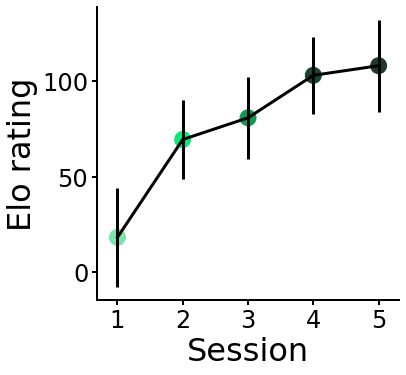

In [16]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,range(1,6),ratings_learn,colors=learn_colors)
ax.set_xlabel('Session')
ax.set_ylabel('Elo rating')
ax.set_xticks(range(1,6))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3a.pdf')
plt.show()

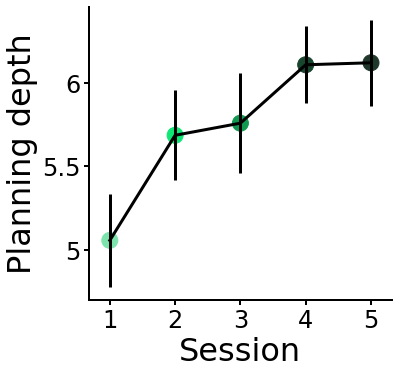

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,range(1,6),np.mean(depth_learn,axis=2),colors=learn_colors)
ax.set_xlabel('Session')
ax.set_ylabel('Planning depth')
ax.set_xticks(range(1,6))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3b.pdf')
plt.show()

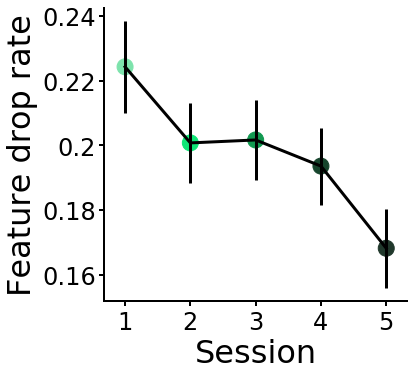

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,range(1,6),np.mean(feature_drop_rate_learn,axis=2),colors=learn_colors)
ax.set_xlabel('Session')
ax.set_ylabel('Feature drop rate')
ax.set_xticks(range(1,6))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3c.pdf')
plt.show()

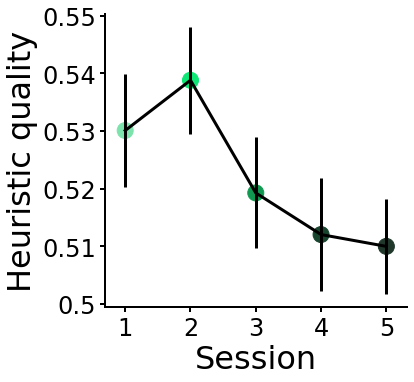

In [19]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,range(1,6),np.mean(heuristic_quality_learn,axis=2),colors=learn_colors)
ax.set_xlabel('Session')
ax.set_ylabel('Heuristic quality')
ax.set_xticks(range(1,6))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3d.pdf')
plt.show()

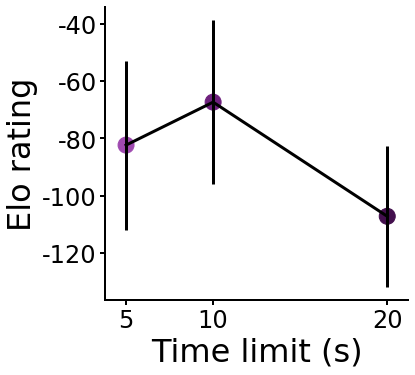

In [20]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,[5,10,20],ratings_time,colors=time_colors)
ax.set_xlabel('Time limit (s)')
ax.set_ylabel('Elo rating')
ax.set_xticks([5,10,20])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3e.pdf')
plt.show()

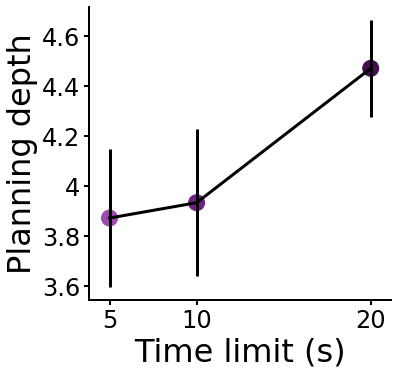

In [21]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,[5,10,20],np.mean(depth_time,axis=2),colors=time_colors)
ax.set_xlabel('Time limit (s)')
ax.set_ylabel('Planning depth')
ax.set_xticks([5,10,20])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3f.pdf')
plt.show()

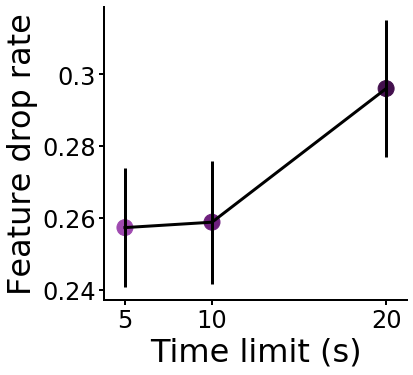

In [22]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,[5,10,20],np.mean(feature_drop_rate_time,axis=2),colors=time_colors)
ax.set_xlabel('Time limit (s)')
ax.set_ylabel('Feature drop rate')
ax.set_xticks([5,10,20])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3g.pdf')
plt.show()

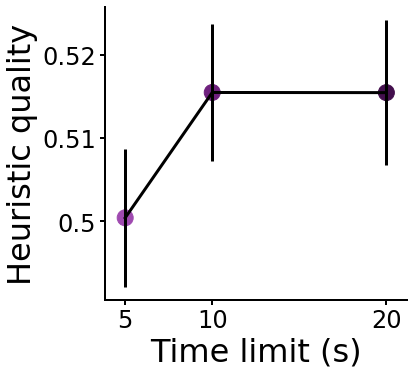

In [23]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,[5,10,20],np.mean(heuristic_quality_time,axis=2),colors=time_colors)
ax.set_xlabel('Time limit (s)')
ax.set_ylabel('Heuristic quality')
ax.set_xticks([5,10,20])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_3h.pdf')
plt.show()

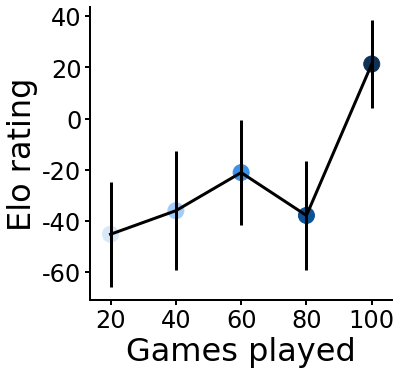

In [24]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,np.arange(20,120,20),ratings_peak,colors=peak_colors)
ax.set_xlabel('Games played')
ax.set_ylabel('Elo rating')
ax.set_xticks(np.arange(20,120,20))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_4a.pdf')
plt.show()

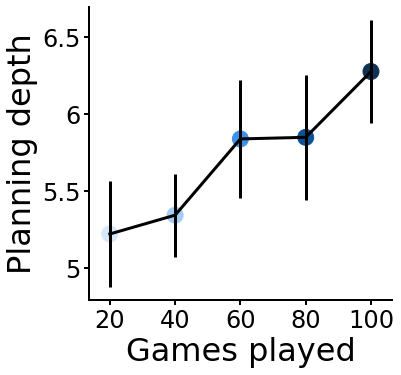

In [25]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,np.arange(20,120,20),np.mean(depth_peak,axis=2),colors=peak_colors)
ax.set_xlabel('Games played')
ax.set_ylabel('Planning depth')
ax.set_xticks(np.arange(20,120,20))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_4b.pdf')
plt.show()

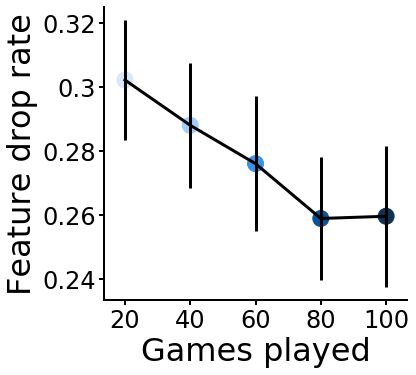

In [26]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,np.arange(20,120,20),np.mean(feature_drop_rate_peak,axis=2),colors=peak_colors)
ax.set_xlabel('Games played')
ax.set_ylabel('Feature drop rate')
ax.set_xticks(np.arange(20,120,20))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_4c.pdf')
plt.show()

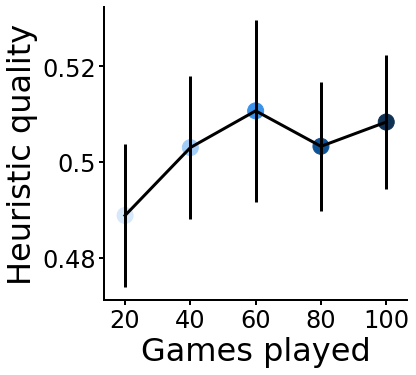

In [27]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,np.arange(20,120,20),np.mean(heuristic_quality_peak,axis=2),colors=peak_colors)
ax.set_xlabel('Games played')
ax.set_ylabel('Heuristic quality')
ax.set_xticks(np.arange(20,120,20))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'figure_4d.pdf')
plt.show()

In [28]:
print('depth')
for x,y in zip([range(5),[5,10,20],range(5)],[depth_learn,depth_time,depth_peak]):
    print(sts.pearsonr(np.tile(x,[30,1]).flatten(),np.mean(y,axis=2).flatten()))
    print(sts.spearmanr(np.tile(x,[30,1]).flatten(),np.mean(y,axis=2).flatten()))

print('feature drop rate')
for x,y in zip([range(5),[5,10,20],range(5)],[feature_drop_rate_learn,feature_drop_rate_time,feature_drop_rate_peak]):
    print(sts.pearsonr(np.tile(x,[30,1]).flatten(),(np.mean(y,axis=2)-np.mean(y,axis=(1,2))[:,None]).flatten()))
    print(sts.spearmanr(np.tile(x,[30,1]).flatten(),np.mean(y,axis=2).flatten()))

print('heuristic quality')
for x,y in zip([range(5),[5,10,20],range(5)],[heuristic_quality_learn,heuristic_quality_time,heuristic_quality_peak]):
    print(sts.pearsonr(np.tile(x,[30,1]).flatten(),np.mean(y,axis=2).flatten()))
    print(sts.spearmanr(np.tile(x,[30,1]).flatten(),np.mean(y,axis=2).flatten()))


depth
(0.23706751200183337, 0.0034897655202440277)
SpearmanrResult(correlation=0.21022532476198413, pvalue=0.00981991648760663)
(0.18178872209312896, 0.08637975483861514)
SpearmanrResult(correlation=0.22943102963134362, pvalue=0.02961110147144177)
(0.1891077841739997, 0.020467491737982676)
SpearmanrResult(correlation=0.1950925851752851, pvalue=0.016737052604238124)
feature drop rate
(-0.3642710248403179, 4.5941180449208176e-06)
SpearmanrResult(correlation=-0.2733691302316634, pvalue=0.0007123648447403557)
(0.33137621643371185, 0.0014206612846463804)
SpearmanrResult(correlation=0.14876349866507213, pvalue=0.16170306067234747)
(-0.1895263326300514, 0.020185043421447346)
SpearmanrResult(correlation=-0.14457754079954163, pvalue=0.0775335979000944)
heuristic quality
(-0.18067166740348542, 0.026932374230634847)
SpearmanrResult(correlation=-0.18159287504038812, pvalue=0.026150564364931496)
(0.11473825278818042, 0.2815481457635414)
SpearmanrResult(correlation=0.1403824564867582, pvalue=0.18693

In [29]:
#plt.plot(heuristic_values[0,0,0,player_color==0],optimal_board_values[player_color==0],'.',alpha=0.5)
#plt.plot(heuristic_values[0,0,0,player_color==1],optimal_board_values[player_color==1],'.',alpha=0.5)
#plt.show()

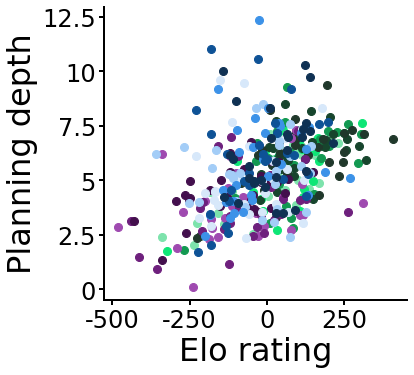

In [30]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,c in enumerate(learn_colors):
    ax.plot(ratings_learn[:,i].flatten(),np.mean(depth_learn,axis=2)[:,i],'.',color=c)
for i,c in enumerate(time_colors):
    ax.plot(ratings_time[:,i].flatten(),np.mean(depth_time,axis=2)[:,i],'.',color=c)
for i,c in enumerate(peak_colors):
    ax.plot(ratings_peak[:,i].flatten(),np.mean(depth_peak,axis=2)[:,i],'.',color=c)

ax.set_xlabel('Elo rating')
ax.set_ylabel('Planning depth')
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'supp_figure_1a.pdf')
plt.show()

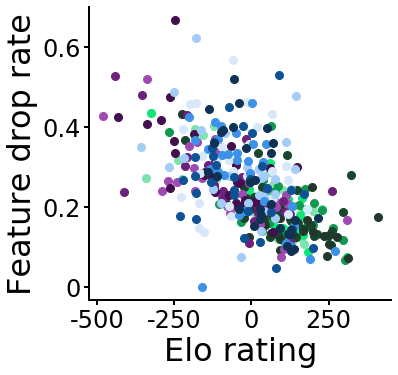

In [31]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,c in enumerate(learn_colors):
    ax.plot(ratings_learn[:,i].flatten(),np.mean(feature_drop_rate_learn,axis=2)[:,i],'.',color=c,alpha=1)
for i,c in enumerate(time_colors):
    ax.plot(ratings_time[:,i].flatten(),np.mean(feature_drop_rate_time,axis=2)[:,i],'.',color=c,alpha=1)
for i,c in enumerate(peak_colors):
    ax.plot(ratings_peak[:,i].flatten(),np.mean(feature_drop_rate_peak,axis=2)[:,i],'.',color=c,alpha=1)

ax.set_xlabel('Elo rating')
ax.set_ylabel('Feature drop rate')
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'supp_figure_1b.pdf')
plt.show()

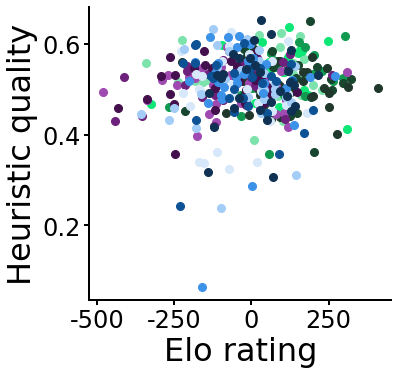

In [32]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,c in enumerate(learn_colors):
    ax.plot(ratings_learn[:,i].flatten(),np.mean(heuristic_quality_learn,axis=2)[:,i],'.',color=c)
for i,c in enumerate(time_colors):
    ax.plot(ratings_time[:,i].flatten(),np.mean(heuristic_quality_time,axis=2)[:,i],'.',color=c)
for i,c in enumerate(peak_colors):
    ax.plot(ratings_peak[:,i].flatten(),np.mean(heuristic_quality_peak,axis=2)[:,i],'.',color=c)

ax.set_xlabel('Elo rating')
ax.set_ylabel('Heuristic quality')
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'supp_figure_1c.pdf')
plt.show()

In [66]:
def plot_param_bars(rho,sem,names,xlabel,c,filename):
    fig,ax = plt.subplots()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_xlim([0,1])
    ax.set_xlabel(xlabel,usetex=False)
    ax.barh(range(len(rho),0,-1), rho, xerr=sem, align='center',
        color=c, ecolor='black')
    plt.xticks(np.arange(0,1.2,0.5))
    plt.yticks(range(len(rho),0,-1),names, fontsize =18)
    fig.savefig(fig_direc + filename)
    plt.show()

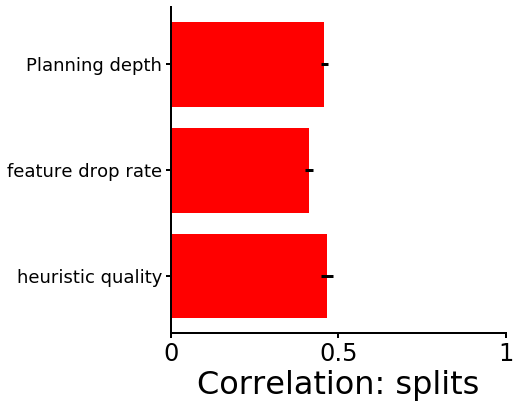

In [80]:
def plot_correlation_across_groups(stats,names,xlabel,fig_name):
    rho = [np.mean(np.corrcoef(np.reshape(x,[-1,5]).T)[np.triu_indices(5,1)]) for x in stats]
    sem = [np.std(np.corrcoef(np.reshape(x,[-1,5]).T)[np.triu_indices(5,1)])/np.sqrt(10) for x in stats]
    plot_param_bars(rho,sem,names,xlabel,'Red',fig_name)

plot_correlation_across_groups([np.hstack([depth_learn,depth_time]),
                                np.hstack([feature_drop_rate_learn,feature_drop_rate_time]),
                                np.hstack([heuristic_quality_learn,heuristic_quality_time])],
                               ['Planning depth','feature drop rate','heuristic quality'],
                               'Correlation: splits','supp_figure_reliability2_A.pdf')

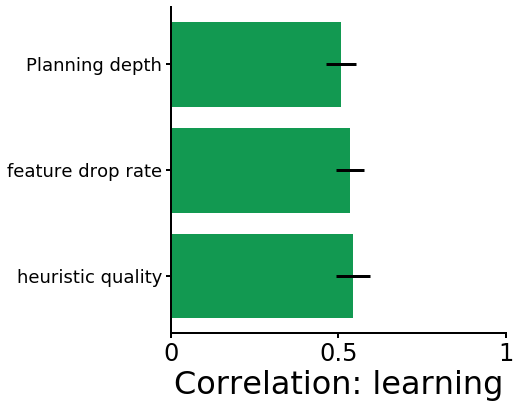

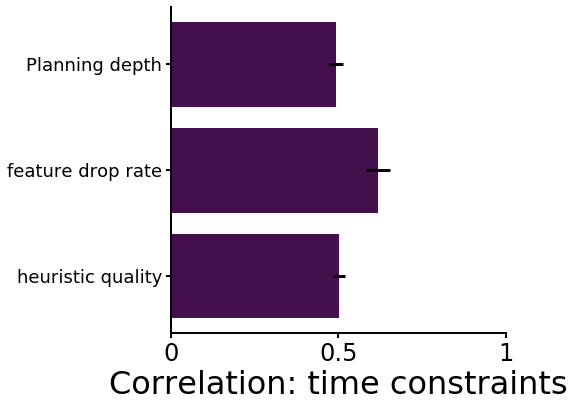

In [83]:
def plot_correlation_across_conditions(stats,names,xlabel,color,fig_name):
    rho = [np.mean(np.corrcoef(np.mean(x,axis=2).T)[np.triu_indices(x.shape[1],1)]) for x in stats]
    sem = [np.std(np.corrcoef(np.mean(x,axis=2).T)[np.triu_indices(x.shape[1],1)])/np.sqrt(10) for x in stats]
    plot_param_bars(rho,sem,names,xlabel,color,fig_name)

plot_correlation_across_conditions([depth_learn,feature_drop_rate_learn,heuristic_quality_learn],
                               ['Planning depth','feature drop rate','heuristic quality'],
                               'Correlation: learning',learn_colors[2],'supp_figure_reliability2_B.pdf')

plot_correlation_across_conditions([depth_time,feature_drop_rate_time,heuristic_quality_time],
                               ['Planning depth','feature drop rate','heuristic quality'],
                               'Correlation: time constraints',time_colors[2],'supp_figure_reliability2_C.pdf')


In [ ]:
print('correlation across groups')
print('correlation across sessions')
plt.imshow(,vmin=-1,vmax=1,cmap='bwr')
plt.show()
print(np.corrcoef(np.mean(x,axis=2).T))

depth
correlation across groups
[[1.         0.26331162 0.27877205 0.28156433 0.35442427]
 [0.26331162 1.         0.42103203 0.30095322 0.377197  ]
 [0.27877205 0.42103203 1.         0.27660446 0.23774298]
 [0.28156433 0.30095322 0.27660446 1.         0.3470842 ]
 [0.35442427 0.377197   0.23774298 0.3470842  1.        ]]
correlation across sessions


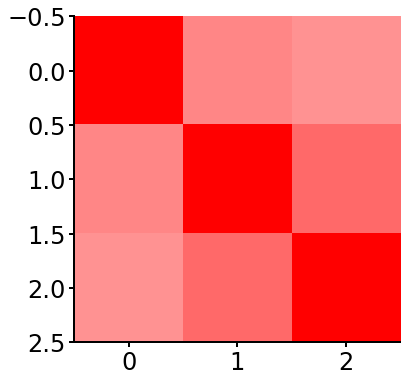

[[1.         0.46964243 0.42421361]
 [0.46964243 1.         0.58459427]
 [0.42421361 0.58459427 1.        ]]
feature drop rate
correlation across groups
[[1.         0.41210746 0.19165913 0.25925778 0.2565729 ]
 [0.41210746 1.         0.46000485 0.43859674 0.40708409]
 [0.19165913 0.46000485 1.         0.30888958 0.34880883]
 [0.25925778 0.43859674 0.30888958 1.         0.3075098 ]
 [0.2565729  0.40708409 0.34880883 0.3075098  1.        ]]
correlation across sessions


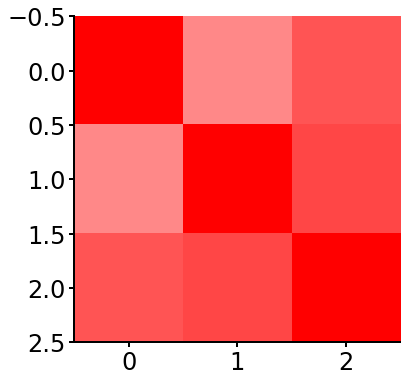

[[1.         0.46507456 0.66881111]
 [0.46507456 1.         0.72315205]
 [0.66881111 0.72315205 1.        ]]
heuristic quality
correlation across groups
[[1.         0.27144515 0.29171117 0.32586618 0.21209489]
 [0.27144515 1.         0.49814713 0.44705568 0.39390575]
 [0.29171117 0.49814713 1.         0.63750007 0.32765779]
 [0.32586618 0.44705568 0.63750007 1.         0.19241896]
 [0.21209489 0.39390575 0.32765779 0.19241896 1.        ]]
correlation across sessions


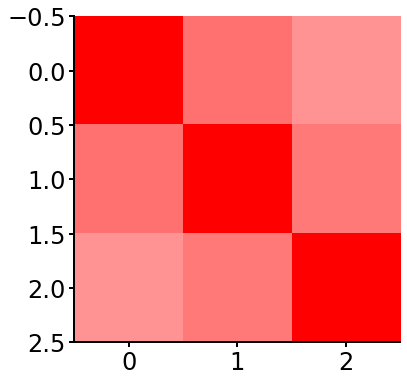

[[1.         0.56242659 0.42218138]
 [0.56242659 1.         0.52047015]
 [0.42218138 0.52047015 1.        ]]


In [34]:
for name,x in zip(['depth','feature drop rate','heuristic quality'],
                  [depth_time,feature_drop_rate_time,heuristic_quality_time]):
    print(name)
    print('correlation across groups')
    print(np.corrcoef(np.reshape(x,[90,5]).T))
    print('correlation across sessions')
    plt.imshow(np.corrcoef(np.mean(x,axis=2).T),vmin=-1,vmax=1,cmap='bwr')
    plt.show()
    print(np.corrcoef(np.mean(x,axis=2).T))

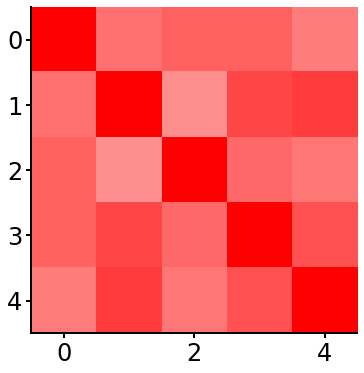

depth
correlation across groups
[[1.         0.22700046 0.31003769 0.22415297 0.42950548]
 [0.22700046 1.         0.1915604  0.21041484 0.1730877 ]
 [0.31003769 0.1915604  1.         0.25997441 0.20614716]
 [0.22415297 0.21041484 0.25997441 1.         0.2361852 ]
 [0.42950548 0.1730877  0.20614716 0.2361852  1.        ]]
correlation across games played


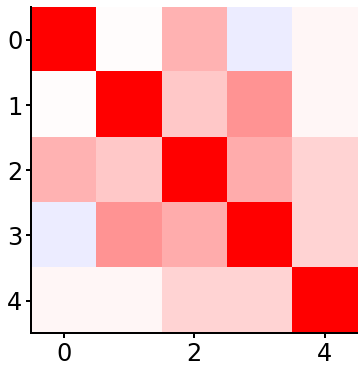

feature drop rate
correlation across groups
[[1.         0.35338709 0.42646187 0.50025349 0.4741948 ]
 [0.35338709 1.         0.34361419 0.20546908 0.19143196]
 [0.42646187 0.34361419 1.         0.33095462 0.30809757]
 [0.50025349 0.20546908 0.33095462 1.         0.34962686]
 [0.4741948  0.19143196 0.30809757 0.34962686 1.        ]]
correlation across games played


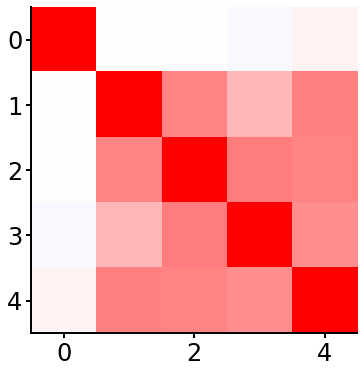

heuristic quality
correlation across groups
[[1.         0.29639579 0.51440847 0.43675586 0.47099475]
 [0.29639579 1.         0.31139953 0.41607356 0.23472426]
 [0.51440847 0.31139953 1.         0.20967902 0.47649458]
 [0.43675586 0.41607356 0.20967902 1.         0.38090383]
 [0.47099475 0.23472426 0.47649458 0.38090383 1.        ]]
correlation across games played


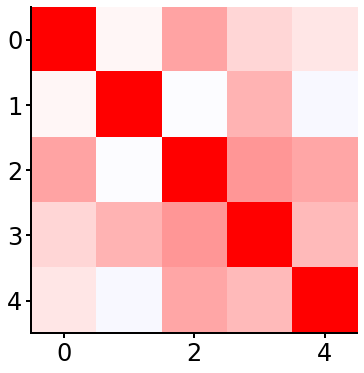

In [35]:
plt.imshow(np.corrcoef(ratings_peak.T),vmin=-1,vmax=1,cmap='bwr')
plt.show()

for name,x in zip(['depth','feature drop rate','heuristic quality'],
                  [depth_peak,feature_drop_rate_peak,heuristic_quality_peak]):
    print(name)
    print('correlation across groups')
    print(np.corrcoef(np.reshape(x,[150,5]).T))
    print('correlation across games played')
    plt.imshow(np.corrcoef(np.mean(x,axis=2).T),vmin=-1,vmax=1,cmap='bwr')
    plt.show()

In [91]:
import pandas as pd
import statsmodels.formula.api as sm

def get_slopes(elo,tree,feat,qual):
    p = sm.ols(formula="y ~ tree + feat + qual",
               data=pd.DataFrame({'y' : elo,'tree': tree,'feat' : feat,'qual' : qual})
              ).fit().params
    return [p[x] for x in ['tree','feat','qual','Intercept']]

In [92]:
slopes = [get_slopes(ratings_learn[:,i],np.mean(depth_learn,axis=2)[:,i],
                     np.mean(feature_drop_rate_learn,axis=2)[:,i],np.mean(heuristic_quality_learn,axis=2)[:,i])
                 for i in range(5)]
ratings_learn_pred = np.mean(np.sum([s*A for s,A in zip(np.mean(slopes,axis=0),
                                                [depth_learn,feature_drop_rate_learn,heuristic_quality_learn])],axis=0),axis=2)
ratings_learn_pred += np.mean(slopes,axis=0)[-1]

In [93]:
np.mean(slopes,axis=0)

array([  33.88609624, -818.19732395,  326.96550672, -126.24462371])

In [38]:
slopes = [get_slopes(ratings_peak[:,i],np.mean(depth_peak,axis=2)[:,i],
                     np.mean(feature_drop_rate_peak,axis=2)[:,i],np.mean(heuristic_quality_peak,axis=2)[:,i])
                 for i in range(5)]
ratings_peak_pred = np.mean(np.sum([s*A for s,A in zip(np.mean(slopes,axis=0),
                                                [depth_peak,feature_drop_rate_peak,heuristic_quality_peak])],axis=0),axis=2)
ratings_peak_pred += np.mean(slopes,axis=0)[-1]

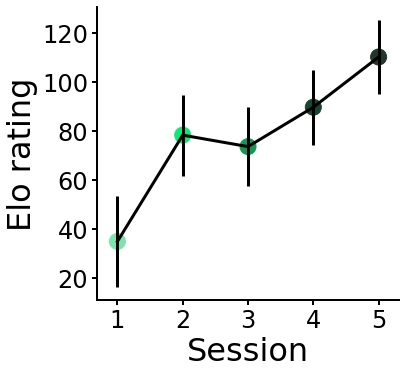

In [39]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,range(1,6),ratings_learn_pred,colors=learn_colors)
ax.set_xlabel('Session')
ax.set_ylabel('Elo rating')
ax.set_xticks(range(1,6))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'supp_figure_2a.pdf')
plt.show()

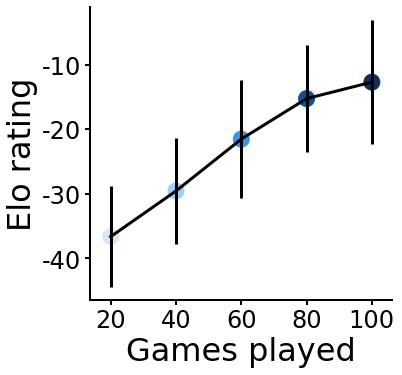

In [40]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plot_with_errorbars(fig,ax,np.arange(20,120,20),ratings_peak_pred,colors=peak_colors)
ax.set_xlabel('Games played')
ax.set_ylabel('Elo rating')
ax.set_xticks(np.arange(20,120,20))
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'supp_fig_2c.pdf')
plt.show()

In [41]:
1-np.sum((ratings_learn_pred-ratings_learn)**2)/np.sum((ratings_learn-np.mean(ratings_learn))**2)

0.56744278688559

In [42]:
1-np.sum((ratings_peak_pred-ratings_peak)**2)/np.sum((ratings_peak-np.mean(ratings_peak))**2)

0.17373354908097338

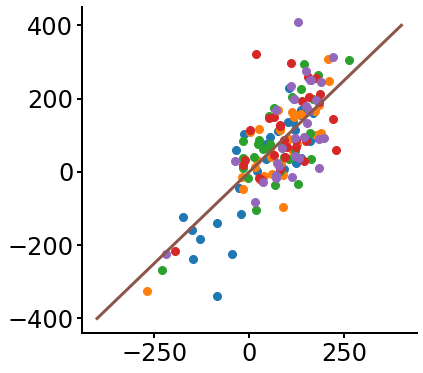

In [43]:
plt.plot(ratings_learn_pred,ratings_learn,'.')
plt.plot([-400,400],[-400,400])
plt.show()

In [44]:
def test_significance(A,x):
    df = pd.DataFrame({'y' : A.flatten(),'subj': np.repeat(range(30),A.shape[1]),'cond' : np.tile(x,30)})
    res = sm.ols(formula="y ~ cond + C(subj)",data=df).fit()
    return res.params['cond'],np.mean((res.conf_int(alpha=0.05).loc['cond'].values-res.params['cond'])*[-1,1]),res.pvalues['cond']


In [45]:
for name,x in zip(['depth','feature drop rate','heuristic quality'],
                  [depth_learn,feature_drop_rate_learn,heuristic_quality_learn]):
    print(name,test_significance(np.mean(x,axis=2),range(5)))


depth (0.2547695634196721, 0.11991745369176254, 5.0470656899158336e-05)
feature drop rate (-0.011931538740666678, 0.005536964956214857, 4.000872213185013e-05)
heuristic quality (-0.006701891926173962, 0.00400906581910267, 0.00123468600075237)


In [46]:
for name,x in zip(['depth','feature drop rate','heuristic quality'],
                  [depth_time,feature_drop_rate_time,heuristic_quality_time]):
    print(name,test_significance(np.mean(x,axis=2),[5,10,20]))


depth (0.04197951477562847, 0.0352165288224548, 0.020297291685353398)
feature drop rate (0.00274507666666661, 0.002036078558120682, 0.009087415159395623)
heuristic quality (0.0008581117204591993, 0.0011287529058824903, 0.13354721343021367)


In [47]:
for name,x in zip(['depth','feature drop rate','heuristic quality'],
                  [depth_peak,feature_drop_rate_peak,heuristic_quality_peak]):
    print(name,test_significance(np.mean(x,axis=2)))


TypeError: test_significance() missing 1 required positional argument: 'x'

In [ ]:
test_significance(ratings_peak)

In [ ]:
test_significance(ratings_learn)